In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [20]:
# konlpy 설치
!apt-get update

!apt-get install g++ openjdk-8-jdk python-dev python3-dev

!pip3 install JPype1-py3

!pip3 install konlpy

!JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:5 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:12 https://developer.download.nvidia.com/compute/machine-learning/repos

In [21]:
import jpype
print(jpype.isJVMStarted())

import nltk
from nltk.tokenize import word_tokenize

nltk.download("all")

False
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   

True

In [3]:
from nltk.corpus import *
from nltk.stem import *
from konlpy.tag import Kkma
from nltk.tokenize import *
from nltk.tag import *
import nltk
from keras.utils import to_categorical
import numpy as np
from keras import *
from keras.datasets import mnist
from collections import Counter
import tensorflow as tf

Using TensorFlow backend.


In [24]:
text="Python is an interpreted, high-level, general-purpose programming language. Created by Guido van Rossum and first released in 1991, Python's design philosophy emphasizes code readability with its notable use of significant whitespace. Its language constructs and object-oriented approach aim to help programmers write clear, logical code for small and large-scale projects.[27] Python is dynamically typed and garbage-collected. It supports multiple programming paradigms, including procedural, object-oriented, and functional programming. Python is often described as a 'batteries included' language due to its comprehensive standard library.[28]"
text=sent_tokenize(text)
text

['Python is an interpreted, high-level, general-purpose programming language.',
 "Created by Guido van Rossum and first released in 1991, Python's design philosophy emphasizes code readability with its notable use of significant whitespace.",
 'Its language constructs and object-oriented approach aim to help programmers write clear, logical code for small and large-scale projects.',
 '[27] Python is dynamically typed and garbage-collected.',
 'It supports multiple programming paradigms, including procedural, object-oriented, and functional programming.',
 "Python is often described as a 'batteries included' language due to its comprehensive standard library.",
 '[28]']

In [25]:
# 아 counter그냥 dictionary처럼 쓰면 알아서 숫자 세줌 ㄱㅇㄷ
# 그리고 생각해보니 원래 sentence 안에 딱 token화된 단어들만 있는게 주타

voc=Counter()
sentences = []
stop_words = stopwords.words('english')
for i in text:
    sentence=word_tokenize(i)
    res = []
    for word in sentence: 
        word=word.lower()
        if word not in stop_words: 
            if len(word) > 2:
                res.append(word)
                voc[word]=voc[word]+1
    sentences.append(res) 
print(sentences)

[['python', 'interpreted', 'high-level', 'general-purpose', 'programming', 'language'], ['created', 'guido', 'van', 'rossum', 'first', 'released', '1991', 'python', 'design', 'philosophy', 'emphasizes', 'code', 'readability', 'notable', 'use', 'significant', 'whitespace'], ['language', 'constructs', 'object-oriented', 'approach', 'aim', 'help', 'programmers', 'write', 'clear', 'logical', 'code', 'small', 'large-scale', 'projects'], ['python', 'dynamically', 'typed', 'garbage-collected'], ['supports', 'multiple', 'programming', 'paradigms', 'including', 'procedural', 'object-oriented', 'functional', 'programming'], ['python', 'often', 'described', "'batteries", 'included', 'language', 'due', 'comprehensive', 'standard', 'library'], []]


In [28]:
type(voc)

collections.Counter

In [31]:
voc

Counter({"'batteries": 1,
         '1991': 1,
         'aim': 1,
         'approach': 1,
         'clear': 1,
         'code': 2,
         'comprehensive': 1,
         'constructs': 1,
         'created': 1,
         'described': 1,
         'design': 1,
         'due': 1,
         'dynamically': 1,
         'emphasizes': 1,
         'first': 1,
         'functional': 1,
         'garbage-collected': 1,
         'general-purpose': 1,
         'guido': 1,
         'help': 1,
         'high-level': 1,
         'included': 1,
         'including': 1,
         'interpreted': 1,
         'language': 3,
         'large-scale': 1,
         'library': 1,
         'logical': 1,
         'multiple': 1,
         'notable': 1,
         'object-oriented': 2,
         'often': 1,
         'paradigms': 1,
         'philosophy': 1,
         'procedural': 1,
         'programmers': 1,
         'programming': 3,
         'projects': 1,
         'python': 4,
         'readability': 1,
         'released'

In [0]:
def ohe(w,word2Idx):
  ohv = [0]*len(word2Idx)
  p = word2Idx[w]
  ohv[p] = 1
  return ohv

In [0]:
text = "오늘 메뉴는 뼈다귀 해장국입니다. 맛있게 먹어요. 국산이래요. 뼈다귀 최고 뼈다귀 최고"

In [4]:
from keras_preprocessing.text import Tokenizer
tok = Tokenizer()
tok.fit_on_texts([text])
tok

In [9]:
tok.word_counts

OrderedDict([('오늘', 1),
             ('메뉴는', 1),
             ('뼈다귀', 3),
             ('해장국입니다', 1),
             ('맛있게', 1),
             ('먹어요', 1),
             ('국산이래요', 1),
             ('최고', 2)])

In [10]:
tok.word_index

{'국산이래요': 8,
 '맛있게': 6,
 '먹어요': 7,
 '메뉴는': 4,
 '뼈다귀': 1,
 '오늘': 3,
 '최고': 2,
 '해장국입니다': 5}

In [0]:
text2 = "뼈다귀 관련 음식을 가장 맛있게 먹어요"

In [8]:
tok.texts_to_sequences([text2]) 
# 내가 만든 corpus에서 알맞은 index를 불러옴!

[[1, 6, 7]]

In [0]:
res = tok.texts_to_sequences([text2])

In [12]:
res[0]

[1, 6, 7]

In [13]:
res[0][1]

6

In [16]:
vLen = len(tok.word_index)
vLen

8

In [18]:
from keras.utils import to_categorical
to_categorical(res,num_classes=vLen+1)
# 짜잔! ohe가 되었다!

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0.]]], dtype=float32)

In [0]:
# ohe의 한계점?

# 1. 음식, 식사, 점심, 날씨 => 원핫인코딩 => 크기:4 => 단어들 간 유사한 정도를 나타내기 어렵다!
# 2. 공간을 많이 차지함(sparse matrix => dense matirx로 해야하지 않나?)
# 3. 연관검색어 표현이 어려움 ex) "뼈다귀" => "뼈다귀 해장국", "뼈다귀 국물", "뼈다귀 감자탕"
# => 해결하기 위한 여러가지 노력 : LSA / Word2Vec
# LSA : 카운트 기반으로 단어의 의미를 벡터화하는 알고리즘
# Word2Vec : 단어를 벡터공간으로 표현 (거리계산 / 단어들 간 의미를 이용)
# Seq2Seq, RNNLM, 

In [0]:
# 언어 모델?
# Vocabulary : 기계가 학습한 단어의 집합
# out of Vocabulary : OOV : 기계가 학습안한 단어들
# 학습된 단어와 학습안된 단어가 있어서 두 단어를 유사도를 보고싶다면?
# => BPE : OOV!

In [0]:
# BPE 알고리즘 : OOV 등장했을때 문제 해결
# KMP, 보이어무어, 레벤슈타인 거리 : 단어 검색 빠르게 해주는 알고리즘
# 1. 모든 단어들을 글자단위로 분리
# 훈련 데이터에 등장한 단어와 단어 빈도수!
# vocab = {'l o w'  : 5, 'l o w e r' : 2,
# 'n e w e s t':6, 'w i d e s t':3}

# 연속으로 가장 많이 등장한 글자의 쌍 => 한 글자로 표현(변환)

In [37]:
import re, collections
def get_stats(vocab):
  pairs = collections.defaultdict(int)
  for word, freq in vocab.items():
    symbols = word.split()
    for i in range(len(symbols)-1):
      pairs[symbols[i],symbols[i+1]] += freq
  return pairs

def merge_vocab(pair, v_in):
  v_out = {}
  bigram = re.escape(' '.join(pair))
  p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
  for word in v_in:
    w_out = p.sub(''.join(pair), word)
    v_out[w_out] = v_in[word]
  return v_out

vocab = {'l o w </w>' : 5, 'l o w e r </w>' : 2,
'n e w e s t </w>':6, 'w i d e s t </w>':3}
num_merges = 10

for i in range(num_merges):
  pairs = get_stats(vocab)
  best = max(pairs, key=pairs.get)
  vocab = merge_vocab(best, vocab)
  print(best)


('e', 's')
('es', 't')
('est', '</w>')
('l', 'o')
('lo', 'w')
('n', 'e')
('ne', 'w')
('new', 'est</w>')
('low', '</w>')
('w', 'i')


In [40]:
pairs

defaultdict(int,
            {('d', 'est</w>'): 3,
             ('e', 'r'): 2,
             ('i', 'd'): 3,
             ('low', 'e'): 2,
             ('r', '</w>'): 2,
             ('w', 'i'): 3})

In [0]:
# 1. BPE 알고리즘 구현(연습문제)
# 2-0. 상품분류(10가지)
# 2. 미니프로젝트 : 개-고양이

In [0]:
from tensorflow import keras

data = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [0]:
train_images.shape

In [25]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [70]:
train_labels.shape

(60000,)

In [88]:
test_labels.shape

(10000,)

In [108]:
test_images.shape

(10000, 28, 28)

In [0]:
test_labels = test_labels.reshape(-1,1)
train_labels = train_labels.reshape(-1,1)

In [0]:
train_images = train_images / 255
test_images = test_images /255

In [113]:
test_labels.shape

(10000, 1)

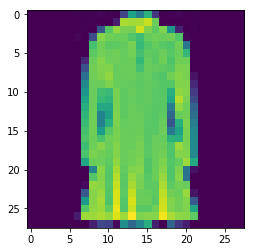

In [24]:
import matplotlib.pyplot as plt
type(test_images[0])
tmp = test_images[29].reshape(28,-1)
plt.imshow(tmp)

In [90]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [0]:
def make_conv_twice(input_layer, num_filter, keep_prob, filter_size=3, strides=1):
  w1 = tf.Variable(tf.random_normal([filter_size,filter_size,1,num_filter]), )
  L1 = tf.nn.conv2d(input_layer, w1, strides=[1,strides,strides,1], padding='SAME')
  L1 = tf.nn.relu(L1)
  w1_1 = tf.Variable(tf.random_normal([filter_size,filter_size,num_filter,num_filter]))
  L1_1 = tf.nn.conv2d(L1, w1_1, strides=[1,strides,strides,1], padding='SAME') 
  L1_1 = tf.nn.relu(L1_1)
  L1_1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
  res = tf.nn.dropout(L1_1, keep_prob=keep_prob)
  
  return res

In [0]:
def make_conv_once(input_layer, num_filter, keep_prob, filter_size=3, strides=1):
  w1 = tf.Variable(tf.random_normal([filter_size,filter_size,1,num_filter]))
  L1 = tf.nn.conv2d(input_layer, w1, strides=[1,strides,strides,1], padding='SAME')
  L1 = tf.nn.relu(L1)
  L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
  res = tf.nn.dropout(L1, keep_prob=keep_prob)
  
  return res

In [0]:
def my_inception_model(input_layer, keep_prob,filter_num_list):
  w1 = tf.Variable(tf.random_normal([1,1,1,filter_num_list[0]]))
  l1 = tf.nn.conv2d(input_layer, w1, strides=[1,1,1,1], padding="SAME")
  
  w2_1 = tf.Variable(tf.random_normal([1,1,1,filter_num_list[1]]))
  l2_1 = tf.nn.conv2d(input_layer, w2_1, strides=[1,1,1,1], padding="SAME")
  w2_2 = tf.Variable(tf.random_normal([3, 3, filter_num_list[1], filter_num_list[2]]))
  l2_2 = tf.nn.conv2d(l2_1, w2_2, strides=[1,1,1,1], padding="SAME")
  
  w3_1 = tf.Variable(tf.random_normal([1,1,1,filter_num_list[3]]))
  l3_1 = tf.nn.conv2d(input_layer, w3_1, strides=[1,1,1,1], padding="SAME")
  w3_2 = tf.Variable(tf.random_normal([5, 5, filter_num_list[3], filter_num_list[4]]))
  l3_2 = tf.nn.conv2d(l3_1, w3_2, strides=[1,1,1,1], padding="SAME")
  
  l4_1 = tf.nn.max_pool(input_layer, ksize=[1,3,3,1], strides=[1,1,1,1], padding="SAME")
  w4_1 = tf.Variable(tf.random_normal([1,1,1,filter_num_list[5]]))
  l4_2 = tf.nn.conv2d(l4_1, w4_1, strides=[1,1,1,1], padding="SAME")
  
  res = tf.concat([l1, l2_2, l3_2, l4_2], 3) # input의 shape가 [-1,28,28,1] 이라고 가정
  
  return res # 다시 이 return된 layer를 inception 모델에 돌리기!

# conv를 열라 많이 때렸으나 정확도가 좋지 않은 비운의 모델

In [0]:
learning_rate = 0.001
training_epochs = 25
batch_size = 128

save_file = './model_mnist_fashion_cnn.ckpt'

tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None,28,28])
x_img = tf.reshape(x, [-1, 28, 28, 1])
y = tf.placeholder(tf.int32, [None,1])
y_ohe = tf.reshape(tf.one_hot(y,10),[-1,10])

keep_prob = tf.placeholder(tf.float32)
keep_prob_flatten = tf.placeholder(tf.float32)

h1 = make_conv_twice(x_img, 32, keep_prob)
h2 = make_conv_twice(h1, 64, keep_prob)
h3 = make_conv_twice(h2, 128, keep_prob)

h3_flat = tf.reshape(h3, [-1,4*4*128])

fcw1 = tf.get_variable("fcw1", shape=[4*4*128,625], initializer=tf.contrib.layers.xavier_initializer())
fcb1 = tf.zeros([625])

h4 = tf.matmul(h3_flat,fcw1) + fcb1
h4 = tf.nn.relu(h4)
h4 = tf.nn.dropout(h4, keep_prob=keep_prob_flatten)

fcw2 = tf.get_variable("fcw2", shape=[625,10], initializer=tf.contrib.layers.xavier_initializer())
fcb2 = tf.zeros([10])
logits = tf.matmul(h4, fcw2) + fcb2
logits = tf.nn.dropout(logits, keep_prob=keep_prob_flatten)
prediction = tf.argmax(logits, 1)

c_pre = tf.equal(tf.argmax(logits,1), tf.argmax(y_ohe,1))
acc = tf.reduce_mean(tf.cast(c_pre, tf.float32))

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_ohe, logits=logits))
train = tf.train.RMSPropOptimizer(learning_rate, 0.9).minimize(cost)

In [35]:
import numpy as np

saver = tf.train.Saver()
my_data = np.zeros([1,28*28])

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(train_images.shape[0]/batch_size)
    for i in range(total_batch):
      batch_xs, batch_ys = train_images[batch_size*i:batch_size*(i+1),:,:], train_labels[batch_size*i:batch_size*(i+1)]
      myfeed = {x:batch_xs, y:batch_ys, keep_prob:0.7, keep_prob_flatten:0.6}
      cv, accv, _ = sess.run([cost, acc, train], feed_dict=myfeed)
      avg_cost += cv/total_batch
    print("epoch: {}, acc: {}, avg_cost: {}".format(epoch,accv,avg_cost))
  
  acu = sess.run(acc, feed_dict={x:test_images,y:test_labels,keep_prob:1,keep_prob_flatten:1})
  print("final_acc: {}".format(\
            sess.run(acc, feed_dict={x:test_images,y:test_labels,keep_prob:1,keep_prob_flatten:1})))
  saver.save(sess, save_file)
#   predict = sess.run(prediction, feed_dict={x:my_data, keep_prob: 1, keep_prob_flatten: 1})
#   print("my_data shape: {}".format(my_data.shape))
#   print(predict[0])
#   print(type(acu))

epoch: 0, acc: 0.5546875, avg_cost: 3.0594221047866026
epoch: 1, acc: 0.53125, avg_cost: 1.2437512167753304
epoch: 2, acc: 0.6015625, avg_cost: 1.1626125858125531
epoch: 3, acc: 0.578125, avg_cost: 1.1341197553098705
epoch: 4, acc: 0.6015625, avg_cost: 1.096178237571676
epoch: 5, acc: 0.6171875, avg_cost: 1.0798191325022626
epoch: 6, acc: 0.5390625, avg_cost: 1.0729044628703688
epoch: 7, acc: 0.59375, avg_cost: 1.0633080405557256
epoch: 8, acc: 0.5234375, avg_cost: 1.0690238815851698
epoch: 9, acc: 0.7109375, avg_cost: 1.0581109702077685
epoch: 10, acc: 0.6484375, avg_cost: 1.0537488116667824
epoch: 11, acc: 0.6640625, avg_cost: 1.0587240085642553
epoch: 12, acc: 0.5546875, avg_cost: 1.0485842376947399
epoch: 13, acc: 0.6796875, avg_cost: 1.0538722423152025
epoch: 14, acc: 0.6484375, avg_cost: 1.0544579096584232
epoch: 15, acc: 0.6171875, avg_cost: 1.04891444513431
epoch: 16, acc: 0.6171875, avg_cost: 1.0519323276403623
epoch: 17, acc: 0.625, avg_cost: 1.0491461590823958
epoch: 18, acc

# Learning Rate만 바꾼 모델

In [0]:
learning_rate = 0.01
training_epochs = 50
batch_size = 128

save_file = './model_mnist_fashion_cnn_mod_lr.ckpt'

tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None,28,28])
x_img = tf.reshape(x, [-1, 28, 28, 1])
y = tf.placeholder(tf.int32, [None,1])
y_ohe = tf.reshape(tf.one_hot(y,10),[-1,10])

keep_prob = tf.placeholder(tf.float32)
keep_prob_flatten = tf.placeholder(tf.float32)

h1 = make_conv_twice(x_img, 32, keep_prob)
h2 = make_conv_twice(h1, 64, keep_prob)
h3 = make_conv_twice(h2, 128, keep_prob)

h3_flat = tf.reshape(h3, [-1,4*4*128])

fcw1 = tf.get_variable("fcw1", shape=[4*4*128,625], initializer=tf.contrib.layers.xavier_initializer())
fcb1 = tf.zeros([625])

h4 = tf.matmul(h3_flat,fcw1) + fcb1
h4 = tf.nn.relu(h4)
h4 = tf.nn.dropout(h4, keep_prob=keep_prob_flatten)

fcw2 = tf.get_variable("fcw2", shape=[625,10], initializer=tf.contrib.layers.xavier_initializer())
fcb2 = tf.zeros([10])
logits = tf.matmul(h4, fcw2) + fcb2
logits = tf.nn.dropout(logits, keep_prob=keep_prob_flatten)
prediction = tf.argmax(logits, 1)

c_pre = tf.equal(tf.argmax(logits,1), tf.argmax(y_ohe,1))
acc = tf.reduce_mean(tf.cast(c_pre, tf.float32))

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_ohe, logits=logits))
train = tf.train.RMSPropOptimizer(learning_rate, 0.9).minimize(cost)

In [0]:
import numpy as np

saver = tf.train.Saver()
my_data = np.zeros([1,28*28])

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(train_images.shape[0]/batch_size)
    for i in range(total_batch):
      batch_xs, batch_ys = train_images[batch_size*i:batch_size*(i+1),:,:], train_labels[batch_size*i:batch_size*(i+1)]
      myfeed = {x:batch_xs, y:batch_ys, keep_prob:0.7, keep_prob_flatten:0.7}
      cv, _ = sess.run([cost, train], feed_dict=myfeed)
      avg_cost += cv/total_batch
    accv = sess.run(acc, feed_dict={x:test_images,y:test_labels,keep_prob:1,keep_prob_flatten:1})
    print("epoch: {}, acc: {}, avg_cost: {}".format(epoch,accv, avg_cost))
  
  acu = sess.run(acc, feed_dict={x:test_images,y:test_labels,keep_prob:1,keep_prob_flatten:1})
  print("final_acc: {}".format(\
            sess.run(acc, feed_dict={x:test_images,y:test_labels,keep_prob:1,keep_prob_flatten:1})))
  saver.save(sess, save_file)
#   predict = sess.run(prediction, feed_dict={x:my_data, keep_prob: 1, keep_prob_flatten: 1})
#   print("my_data shape: {}".format(my_data.shape))
#   print(predict[0])
#   print(type(acu))

# 적당히 하자 모델

In [0]:
learning_rate = 0.0025
training_epochs = 30
batch_size = 128

save_file = './model_mnist_fashion_cnn_modified.ckpt'

tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None,28,28])
x_img = tf.reshape(x, [-1, 28, 28, 1])
y = tf.placeholder(tf.int32, [None,1])
y_ohe = tf.reshape(tf.one_hot(y,10),[-1,10])

keep_prob = tf.placeholder(tf.float32)
keep_prob_flatten = tf.placeholder(tf.float32)

h1 = make_conv_once(x_img, 32, keep_prob)
h2 = make_conv_once(h1, 64, keep_prob)
h3 = make_conv_once(h2, 128, keep_prob)

h3_flat = tf.reshape(h3, [-1,4*4*128])

fcw1 = tf.get_variable("fcw1", shape=[4*4*128,625], initializer=tf.contrib.layers.xavier_initializer())
fcb1 = tf.zeros([625])

h4 = tf.matmul(h3_flat,fcw1) + fcb1
h4 = tf.nn.relu(h4)
h4 = tf.nn.dropout(h4, keep_prob=keep_prob_flatten)

fcw2 = tf.get_variable("fcw2", shape=[625,10], initializer=tf.contrib.layers.xavier_initializer())
fcb2 = tf.zeros([10])
logits = tf.matmul(h4, fcw2) + fcb2
logits = tf.nn.dropout(logits, keep_prob=keep_prob_flatten)
prediction = tf.argmax(logits, 1)

c_pre = tf.equal(tf.argmax(logits,1), tf.argmax(y_ohe,1))
acc = tf.reduce_mean(tf.cast(c_pre, tf.float32))

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_ohe, logits=logits))
train = tf.train.RMSPropOptimizer(learning_rate, 0.9).minimize(cost)

In [38]:
import numpy as np

saver = tf.train.Saver()
my_data = np.zeros([1,28*28])

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(train_images.shape[0]/batch_size)
    for i in range(total_batch):
      batch_xs, batch_ys = train_images[batch_size*i:batch_size*(i+1),:,:], train_labels[batch_size*i:batch_size*(i+1)]
      myfeed = {x:batch_xs, y:batch_ys, keep_prob:0.7, keep_prob_flatten:0.7}
      cv, accv,  _ = sess.run([cost, acc, train], feed_dict=myfeed)
      avg_cost += cv/total_batch
    print("epoch: {}, train_acc: {}, avg_cost: {}".format(epoch,accv,avg_cost))
  
  acu = sess.run(acc, feed_dict={x:test_images,y:test_labels,keep_prob:1,keep_prob_flatten:1})
  print("final_acc: {}".format(\
            sess.run(acc, feed_dict={x:test_images,y:test_labels,keep_prob:1,keep_prob_flatten:1})))
  saver.save(sess, save_file)
#   predict = sess.run(prediction, feed_dict={x:my_data, keep_prob: 1, keep_prob_flatten: 1})
#   print("my_data shape: {}".format(my_data.shape))
#   print(predict[0])
#   print(type(acu))

epoch: 0, train_acc: 0.7109375, avg_cost: 2.138404281220886
epoch: 1, train_acc: 0.6875, avg_cost: 0.9358284763800786
epoch: 2, train_acc: 0.6640625, avg_cost: 0.8808967789523615
epoch: 3, train_acc: 0.6953125, avg_cost: 0.8534735243799336
epoch: 4, train_acc: 0.7578125, avg_cost: 0.8344270827678532
epoch: 5, train_acc: 0.6875, avg_cost: 0.8301192546247423
epoch: 6, train_acc: 0.6484375, avg_cost: 0.8256801431759814
epoch: 7, train_acc: 0.7109375, avg_cost: 0.8298501284458696
epoch: 8, train_acc: 0.6328125, avg_cost: 0.8208086289401745
epoch: 9, train_acc: 0.6875, avg_cost: 0.8056632049827499
epoch: 10, train_acc: 0.7265625, avg_cost: 0.8018204117687351
epoch: 11, train_acc: 0.6875, avg_cost: 0.7936000848173077
epoch: 12, train_acc: 0.6328125, avg_cost: 0.7918314486105215
epoch: 13, train_acc: 0.6875, avg_cost: 0.7921625755281534
epoch: 14, train_acc: 0.6796875, avg_cost: 0.7873407641791891
epoch: 15, train_acc: 0.7109375, avg_cost: 0.7834360244182443
epoch: 16, train_acc: 0.6875, avg_

# 좀 더 적당히 하자 모델

In [0]:
tf.reset_default_graph()

learning_rate = 0.0025
training_epochs = 30
batch_size = 100

save_file = './model_mnist_fashion_cnn_modified.ckpt'

x = tf.placeholder(tf.float32, [None,28,28])
x_img = tf.reshape(x, [-1, 28, 28, 1])
y = tf.placeholder(tf.int32, [None,1])
y_ohe = tf.reshape(tf.one_hot(y,10),[-1,10])

keep_prob = tf.placeholder(tf.float32)
keep_prob_flatten = tf.placeholder(tf.float32)

h1 = make_conv_once(x_img, 32, keep_prob)
h2 = make_conv_once(h1, 64, keep_prob)

h3_flat = tf.reshape(h2, [-1,7*7*64])

fcw1 = tf.get_variable("fcw1", shape=[7*7*64,625], initializer=tf.contrib.layers.xavier_initializer())
fcb1 = tf.zeros([625])

h4 = tf.matmul(h3_flat,fcw1) + fcb1
h4 = tf.nn.relu(h4)
h4 = tf.nn.dropout(h4, keep_prob=keep_prob_flatten)

fcw2 = tf.get_variable("fcw2", shape=[625,10], initializer=tf.contrib.layers.xavier_initializer())
fcb2 = tf.zeros([10])
logits = tf.matmul(h4, fcw2) + fcb2
logits = tf.nn.dropout(logits, keep_prob=keep_prob_flatten)
prediction = tf.argmax(logits, 1)

c_pre = tf.equal(tf.argmax(logits,1), tf.argmax(y_ohe,1))
acc = tf.reduce_mean(tf.cast(c_pre, tf.float32))

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_ohe, logits=logits))
train = tf.train.RMSPropOptimizer(learning_rate, 0.9).minimize(cost)

In [48]:
import numpy as np

saver = tf.train.Saver()
my_data = np.zeros([1,28*28])

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(train_images.shape[0]/batch_size)
    for i in range(total_batch):
      batch_xs, batch_ys = train_images[batch_size*i:batch_size*(i+1),:,:], train_labels[batch_size*i:batch_size*(i+1)]
      myfeed = {x:batch_xs, y:batch_ys, keep_prob:0.7, keep_prob_flatten:0.7}
      cv, accv,  _ = sess.run([cost, acc, train], feed_dict=myfeed)
      avg_cost += cv/total_batch
    print("epoch: {}, train_acc: {}, avg_cost: {}".format(epoch,accv,avg_cost))
  
  acu = sess.run(acc, feed_dict={x:test_images,y:test_labels,keep_prob:1,keep_prob_flatten:1})
  print("final_acc: {}".format(\
            sess.run(acc, feed_dict={x:test_images,y:test_labels,keep_prob:1,keep_prob_flatten:1})))
  saver.save(sess, save_file)
#   predict = sess.run(prediction, feed_dict={x:my_data, keep_prob: 1, keep_prob_flatten: 1})
#   print("my_data shape: {}".format(my_data.shape))
#   print(predict[0])
#   print(type(acu))

epoch: 0, train_acc: 0.7099999785423279, avg_cost: 1.522604408264158
epoch: 1, train_acc: 0.7400000095367432, avg_cost: 0.8096714786688479
epoch: 2, train_acc: 0.75, avg_cost: 0.7813786839445435
epoch: 3, train_acc: 0.7699999809265137, avg_cost: 0.7733025095363459
epoch: 4, train_acc: 0.7599999904632568, avg_cost: 0.7740225375692054
epoch: 5, train_acc: 0.6700000166893005, avg_cost: 0.777297642727693
epoch: 6, train_acc: 0.7699999809265137, avg_cost: 0.7684856707354376
epoch: 7, train_acc: 0.7699999809265137, avg_cost: 0.7669178994496663
epoch: 8, train_acc: 0.7400000095367432, avg_cost: 0.7638794798652329
epoch: 9, train_acc: 0.75, avg_cost: 0.7554289832711218
epoch: 10, train_acc: 0.7200000286102295, avg_cost: 0.7483770808080829
epoch: 11, train_acc: 0.7200000286102295, avg_cost: 0.7409332417945069
epoch: 12, train_acc: 0.7599999904632568, avg_cost: 0.7370366824169958
epoch: 13, train_acc: 0.7599999904632568, avg_cost: 0.7331250117222464
epoch: 14, train_acc: 0.6899999976158142, avg_

In [101]:
train_images.shape

(60000, 28, 28)

In [103]:
train_labels.shape

(60000,)

In [15]:
# You can change the directory name

LOG_DIR = 'tb_logs'



!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

!unzip ngrok-stable-linux-amd64.zip



import os

if not os.path.exists(LOG_DIR):

  os.makedirs(LOG_DIR)

  

get_ipython().system_raw('tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'.format(LOG_DIR))



get_ipython().system_raw('./ngrok http 6006 &')



!curl -s http://localhost:4040/api/tunnels | python3 -c "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

--2019-08-08 08:01:05--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.72.245.79, 3.214.163.243, 3.219.64.173, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.72.245.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13607069 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.2’

ngrok-stable-linux- 100%[===================>]  12.98M  14.2MB/s    in 0.9s    

2019-08-08 08:01:07 (14.2 MB/s) - ‘ngrok-stable-linux-amd64.zip.2’ saved [13607069/13607069]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ngrok                   
https://0dacd9e6.ngrok.io
